Simulation Setup Commencing...
0.0% - 25.0% - 50.0% - 75.0% - 100.0%

Plot Setup Commencing...
0.0% - 25.0% - 50.0% - 75.0% - 100.0%
Please wait a moment for the plot to appear.

Maximum Deviation: +/- 24.10 usec (964 ticks at nominal frequency)


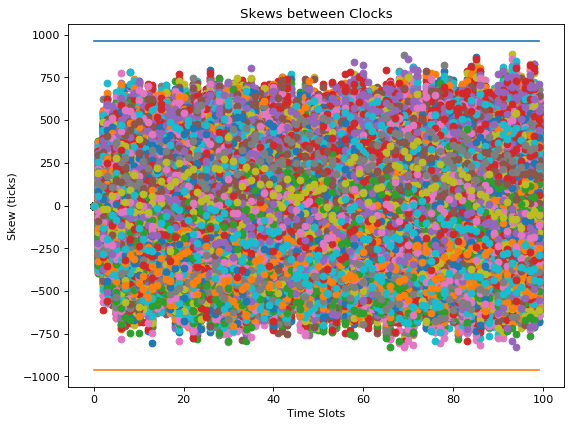

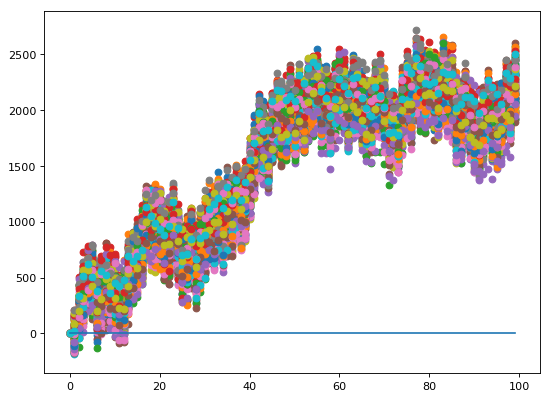

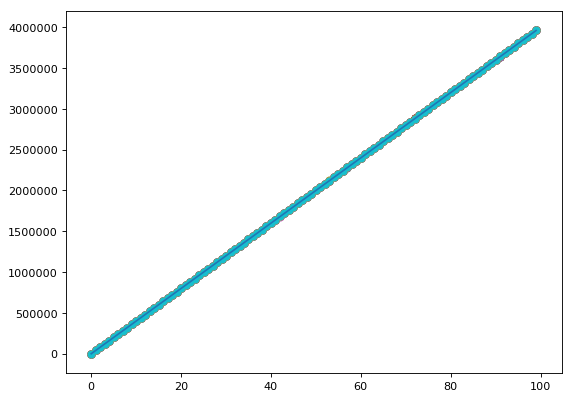

In [5]:
%matplotlib inline
from clocksync_funcs import *

# This simulation implements Lonn's algorithm for clock synchronization and outputs the relative skew between nodes
# "A Fault Tolerant Clock Synchronization Algorithm for Systems With Low-Precision Oscillators" Henrik Lonn 1999


# Set Parameter Values:
clock_freq = 40         # oscillator frequency (MHz)
freq_tolerance = .5     # frequency stability in %
timeslot_tolerance = .5 # timeslot jitter parameter in %
timeslot_period = 1     # timeslot period (milliseconds)
node_count = 100        # number of nodes, advised to not exceed 150
sim_length = 100        # number of timeslots for simulation to run
r = 2.41                # r parameter for daisy chain algorithm 


# Run Simulation
clock_sync_sim(adjustment_func=daisy_adj,
               clock_freq=clock_freq, 
               freq_tolerance=freq_tolerance,
               timeslot_tolerance=timeslot_tolerance,
               timeslot_period=timeslot_period, 
               node_count=node_count, 
               sim_length=sim_length, 
               r=r);
